In [1]:
import os
import polars as pl
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

In [2]:
dataroot = Path("./assets/preprocessed")
train_path = dataroot / "Train_nus-wide.ndjson"
test_path = dataroot / "Test_nus-wide.ndjson"

In [3]:
test = pl.read_ndjson(test_path)
train = pl.read_ndjson(train_path)

test = set(test["file_name"])
train = set(train["file_name"])
test.intersection(train)

set()

In [4]:
test = pl.read_ndjson(test_path)
tsample = test
tsample = tsample.filter(pl.col("labels").list.len() > 3)
tsample = tsample.sample(4, seed=51)
tsample.glimpse()

Rows: 4
Columns: 4
$ file_name        <str> '0578_537618528.jpg', '0469_86356110.jpg', '0344_2252859128.jpg', '0024_287966946.jpg'
$ labels     <list[str]> ['clouds', 'grass', 'plants', 'sky', 'tree'], ['ocean', 'sports', 'surf', 'water'], ['clouds', 'lake', 'ocean', 'person', 'water'], ['frost', 'reflection', 'sky', 'tree']
$ tags       <list[str]> ['tree', 'england', 'rural', 'countryside', 'fields', 'june'], ['water', 'sea', 'summer', 'sports', 'waves', 'action', 'sport', 'wave', 'surf'], ['nature', 'water', 'landscape', 'street', 'photography', 'lake', 'eos', 'child', 'stone', 'kid', 'switzerland', 'tourism', 'rebel', 'candid', 'monochrome'], ['explore', 'reflection', 'interestingness', 'fall', 'frost']
$ image_root       <str> './assets/nus-wide/images', './assets/nus-wide/images', './assets/nus-wide/images', './assets/nus-wide/images'



GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/rinkuro/Sandbox/wallpaper_app/wallpaper_tagging/.venv/lib/python3.11/site-packages/lightning/fabric/loggers/csv_logs.py:268: Experiment logs directory assets/trained_models/compose.test/logs/version_0 exists and is not empty. Previous log files in this directory will be deleted when the new ones are saved!
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]


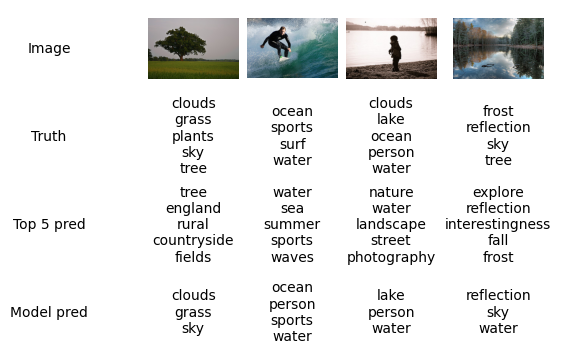

In [5]:
from scripts.test.compose import trainer, model, data
os.environ["SPECIFIC_IMGS"] = ",".join(tsample["file_name"])

alignment = {"verticalalignment": "center", "horizontalalignment": "center"}

preds = trainer.predict(model, datamodule=data)
fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(5.5, 3.5), layout="constrained")
for ax in axs.ravel():
    ax.set_axis_off()
for i, txt in enumerate(["Image", "Truth", "Top 5 pred", "Model pred"]):
    axs[i,0].text(0, 0.5, txt, **alignment)
for i, path in enumerate(tsample["file_name"]):
    img_path = Path(tsample["image_root"][i], path)
    img = plt.imread(img_path)
    axs[0,i+1].imshow(img)
    axs[1,i+1].text(0.5, 0.5, "\n".join(tsample["labels"][i]), **alignment)
    axs[2,i+1].text(0.5, 0.5, "\n".join(tsample["tags"][i][:5]), **alignment)
    axs[3,i+1].text(0.5, 0.5, "\n".join(preds[0][i] if len(preds[0][i]) > 0 else ["-"]), **alignment)